<a href="https://colab.research.google.com/github/moahmedzaghloula/CodeClause-Internship/blob/main/Age_And_Gender_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import load_img
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir ~/.kaggle
!cp "/content/drive/MyDrive/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d jangedoo/utkface-new

utkface-new.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip utkface-new.zip

Archive:  utkface-new.zip
replace UTKFace/100_0_0_20170112213500903.jpg.chip.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
data_dir = '/content/UTKFace'
age_labels = []
gender_labels = []
image_paths = []

image_filenames = os.listdir(data_dir)
random.shuffle(image_filenames)

for image in tqdm(image_filenames):
  image_path = os.path.join(data_dir, image)
  img_components = image.split('_')
  age_label = int(img_components[0])
  gender_label = int(img_components[1])

  # Append the image_path, age_label, and gender_label
  age_labels.append(age_label)
  gender_labels.append(gender_label)
  image_paths.append(image_path)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
print(f'Number of age_labels: {len(age_labels)}')
print(f'Number of gender_labels: {len(gender_labels)}')
print(f'Number of image_paths: {len(image_paths)}')

Number of age_labels: 23708
Number of gender_labels: 23708
Number of image_paths: 23708


In [ ]:
gender_mapping = {
    1: 'Female',
    0: 'Male'
}

In [ ]:
import pandas as pd
data = pd.DataFrame()
data['image_path'], data['age'], data['gender'] = image_paths, age_labels, gender_labels
data.head(10)

image_path  age  gender
0  /content/UTKFace/27_0_4_20170117012822305.jpg....   27       0
1  /content/UTKFace/96_1_2_20170110182526540.jpg....   96       1
2  /content/UTKFace/28_1_3_20170119195056083.jpg....   28       1
3  /content/UTKFace/54_1_0_20170117171652901.jpg....   54       1
4  /content/UTKFace/45_0_3_20170119154224697.jpg....   45       0
5  /content/UTKFace/18_1_1_20170109212540841.jpg....   18       1
6  /content/UTKFace/52_1_0_20170110153654447.jpg....   52       1
7  /content/UTKFace/25_1_1_20170112205154091.jpg....   25       1
8  /content/UTKFace/8_1_0_20170109202720967.jpg.c...    8       1
9  /content/UTKFace/28_0_0_20170105164905292.jpg....   28       0

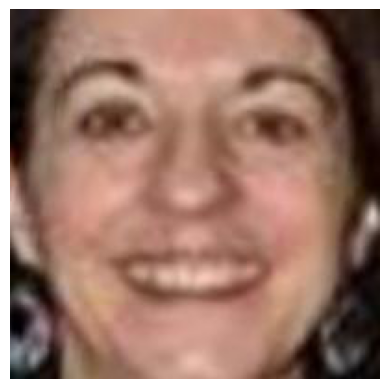

In [ ]:
from PIL import Image
img = Image.open(data['image_path'][41])
plt.axis('off')
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

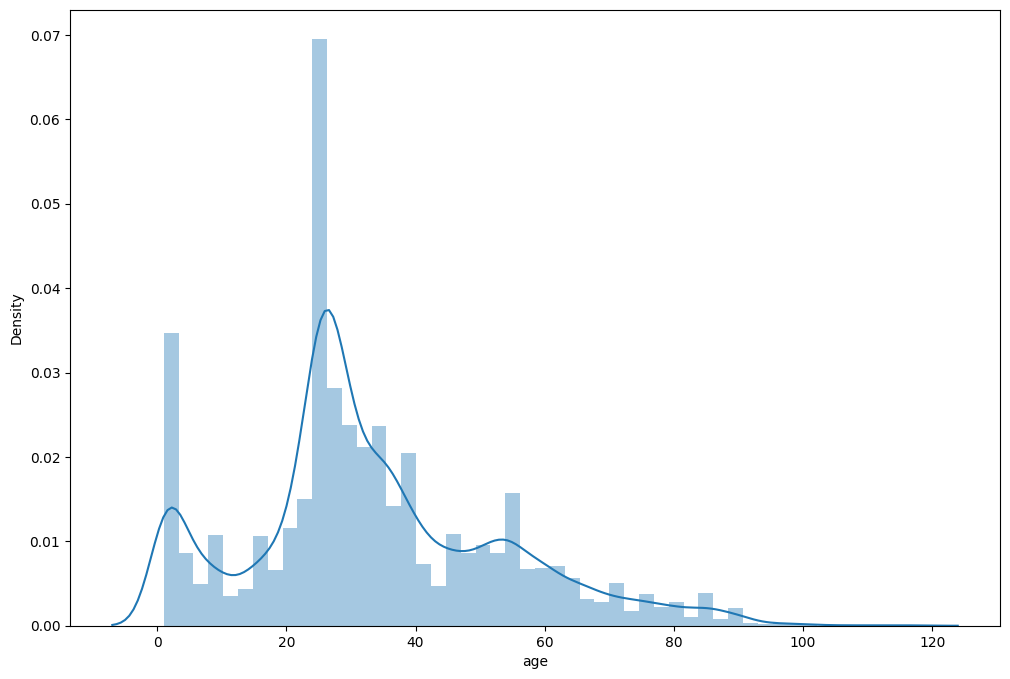

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(data['age'])

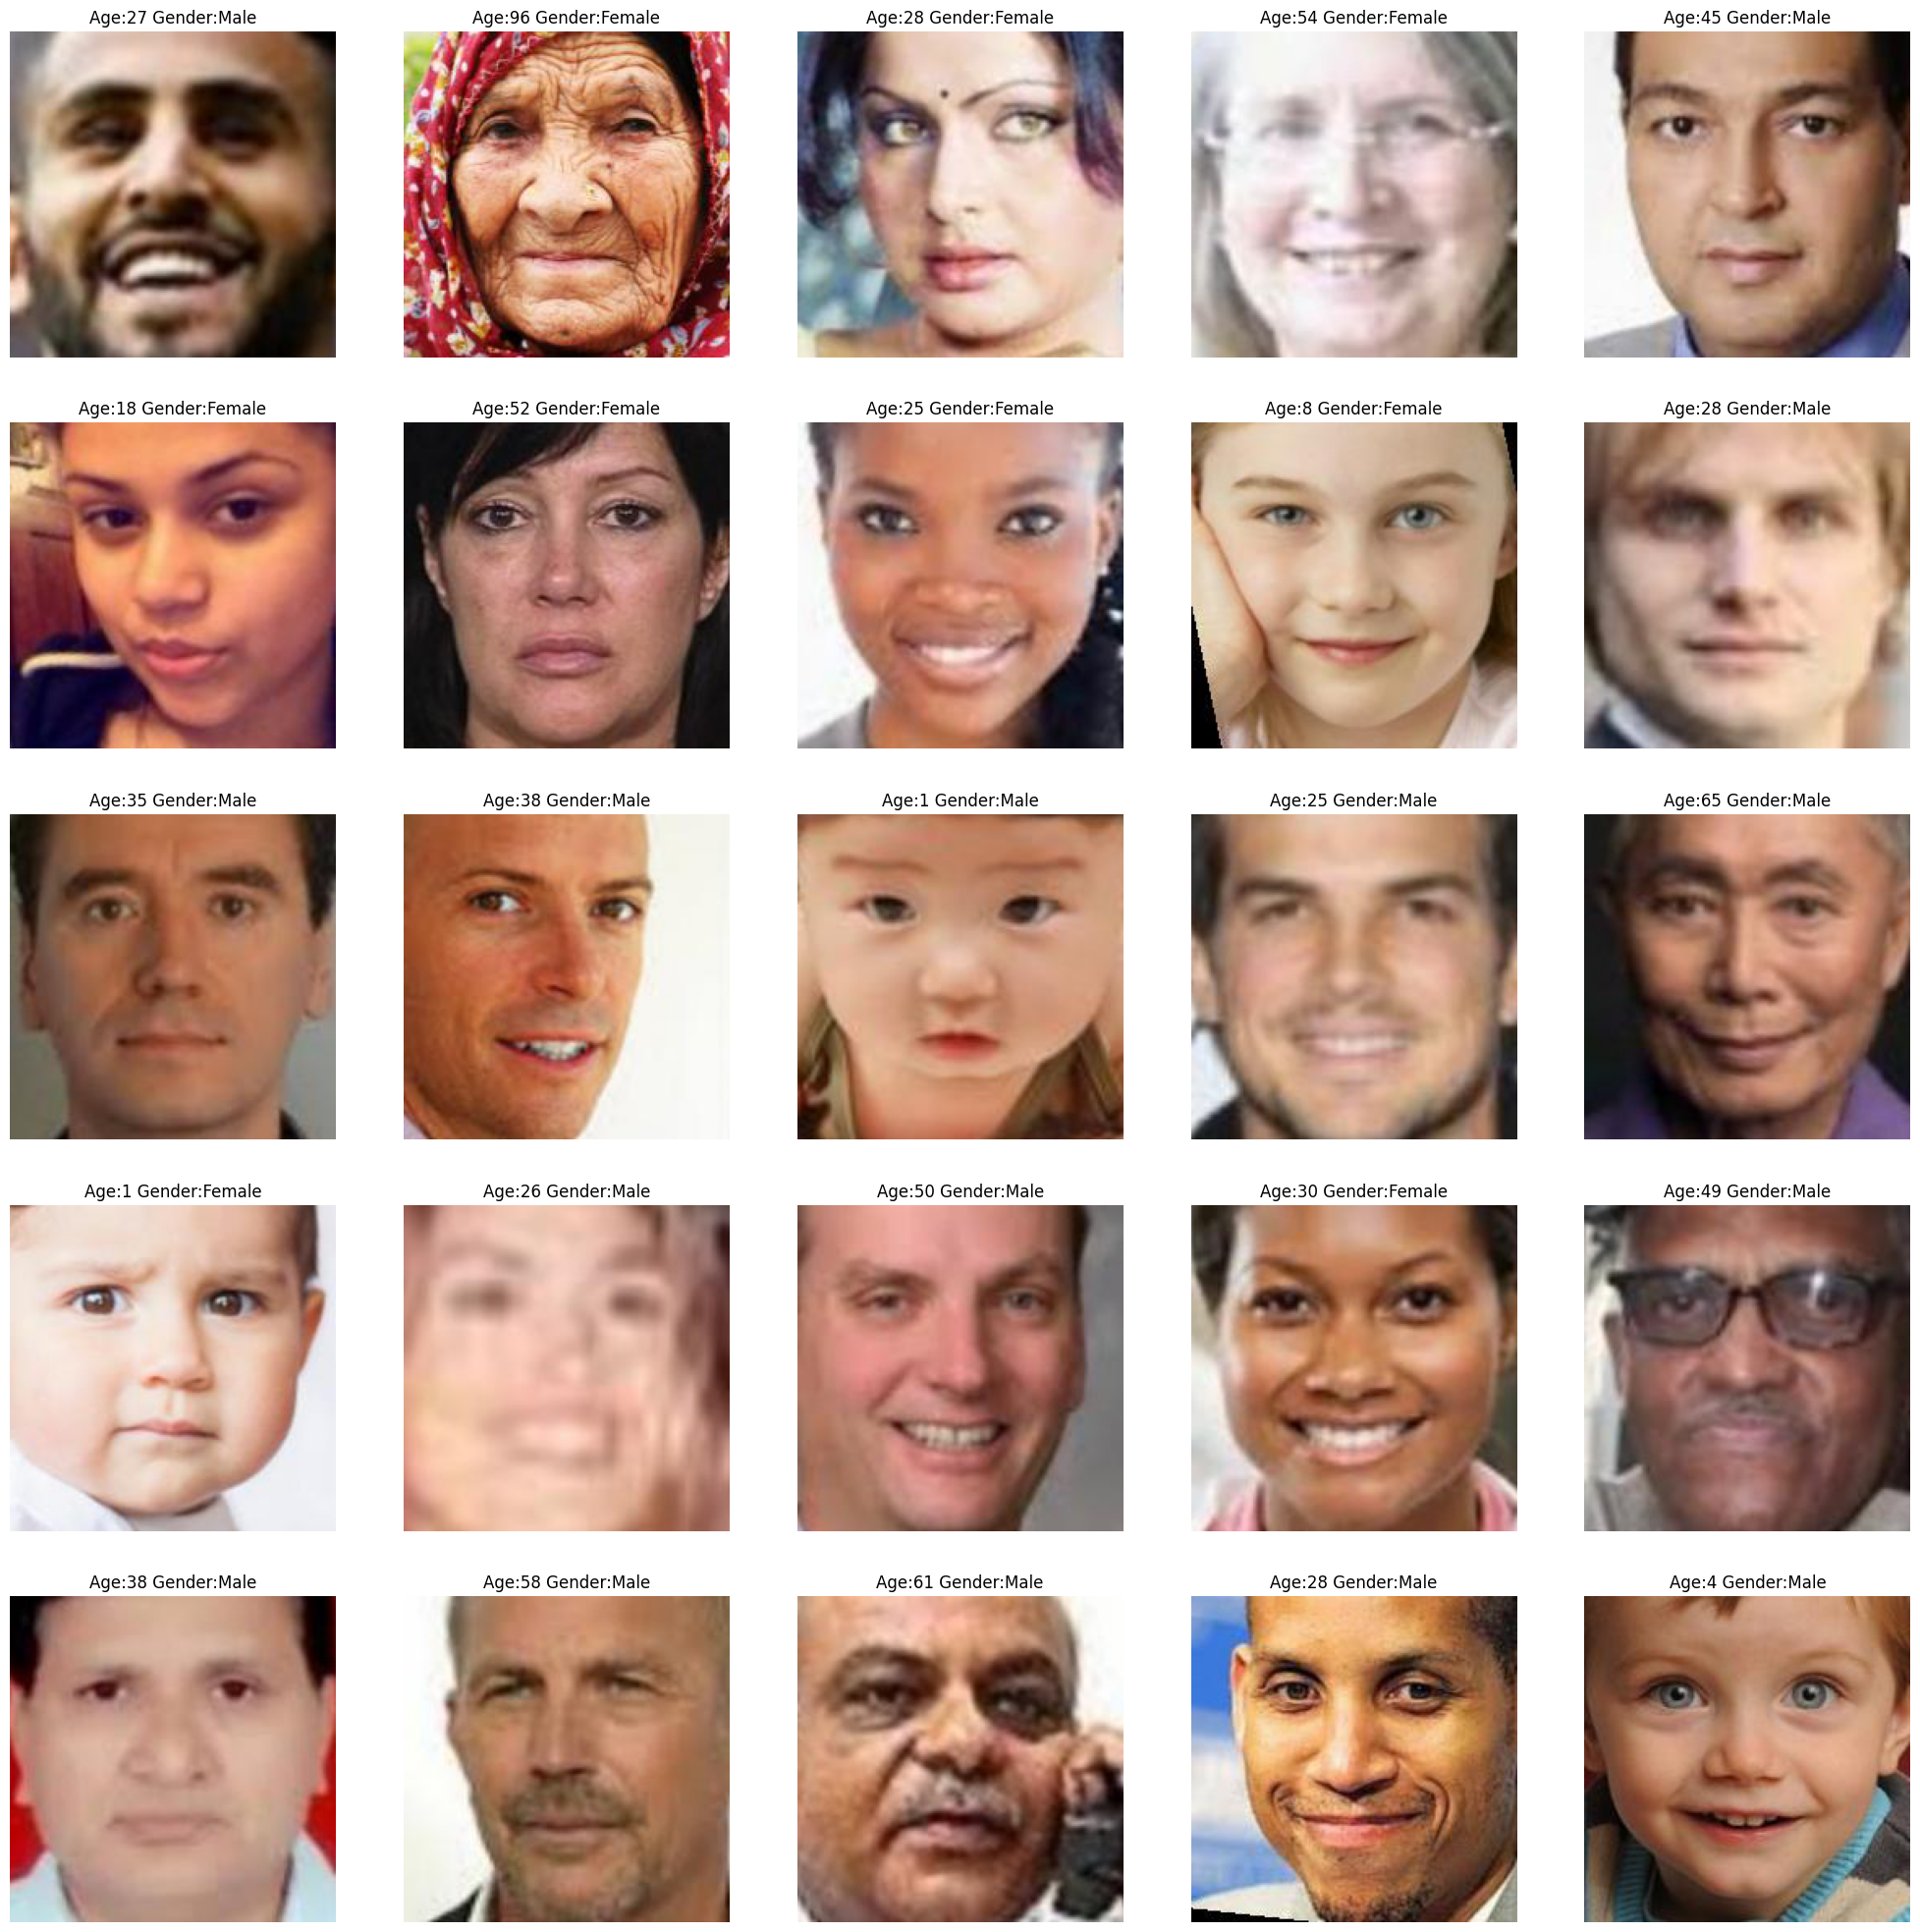

In [ ]:
plt.figure(figsize=(25,25))
files = data.iloc[0:25]

for index , file , age , gender in files.itertuples():
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title(f"Age:{age} Gender:{gender_mapping[gender]}")
  plt.axis('off')

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [ ]:
X = extract_features(data['image_path'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
X.shape

(23708, 128, 128, 1)

In [ ]:
X = X/255.0

In [ ]:
y_gender = np.array(data['gender'])
y_age = np.array(data['age'])

In [ ]:
input_shape = (128, 128, 1)

In [ ]:
input = Input((input_shape))


Conv1 = Conv2D (32 , kernel_size = (3,3) , activation = 'relu') (input)
max1 = MaxPooling2D(pool_size = (2,2)) (Conv1)
Conv2 = Conv2D (32 , kernel_size = (3,3) , activation = 'relu') (max1)
max2 = MaxPooling2D(pool_size = (2,2)) (Conv2)
Conv3 = Conv2D (32 , kernel_size = (3,3) , activation = 'relu') (max2)
max3 = MaxPooling2D(pool_size = (2,2)) (Conv3)
Conv4 = Conv2D (32 , kernel_size = (3,3) , activation = 'relu') (max3)
max4 = MaxPooling2D(pool_size = (2,2)) (Conv4)

flatten = Flatten() (max4)

dense1 = Dense (256,activation ='relu') (flatten)
dense2 = Dense (256,activation ='relu') (flatten)

dropout1 = Dropout(0.3) (dense1)
dropout2 = Dropout(0.3) (dense2)

output1 = Dense(1, activation='sigmoid', name='gender_out') (dropout1)
output2 = Dense(1, activation='relu', name='age_out') (dropout2)

model = Model(inputs = [input] , outputs = [output1 , output2])














In [ ]:
model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

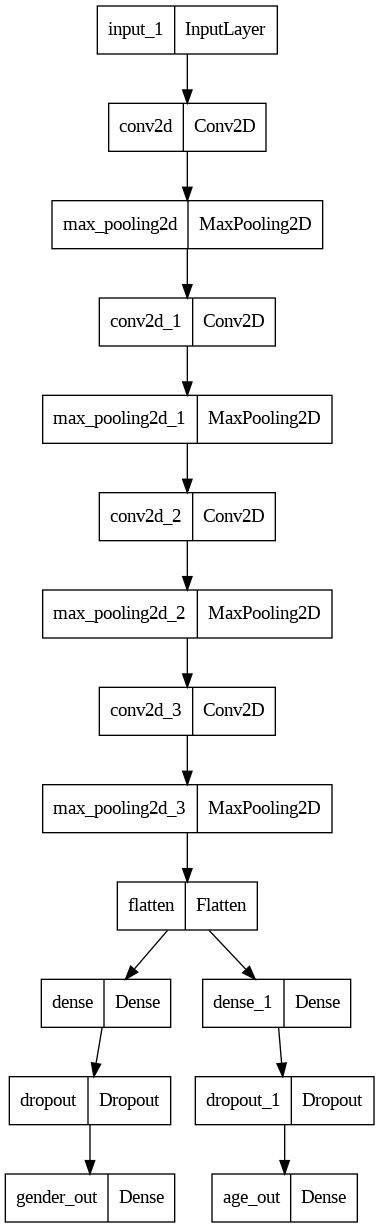

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
from keras.callbacks import EarlyStopping


# Set up the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

callbacks=[early_stopping]

In [25]:
training_model = model.fit(x=X, y=[y_gender, y_age], batch_size=16, epochs=30, validation_split=0.2,callbacks = callbacks)

Epoch 1/30
1186/1186 [==============================] - 477s 400ms/step - loss: 15.9308 - gender_out_loss: 0.6903 - age_out_loss: 15.2405 - gender_out_accuracy: 0.5396 - age_out_accuracy: 0.0468 - val_loss: 14.5456 - val_gender_out_loss: 0.6394 - val_age_out_loss: 13.9062 - val_gender_out_accuracy: 0.6221 - val_age_out_accuracy: 0.0496
Epoch 2/30
1186/1186 [==============================] - 465s 393ms/step - loss: 12.8059 - gender_out_loss: 0.5212 - age_out_loss: 12.2847 - gender_out_accuracy: 0.7395 - age_out_accuracy: 0.0390 - val_loss: 10.7472 - val_gender_out_loss: 0.4506 - val_age_out_loss: 10.2965 - val_gender_out_accuracy: 0.7811 - val_age_out_accuracy: 0.0253
Epoch 3/30
1186/1186 [==============================] - 456s 384ms/step - loss: 11.1641 - gender_out_loss: 0.4528 - age_out_loss: 10.7113 - gender_out_accuracy: 0.7818 - age_out_accuracy: 0.0195 - val_loss: 10.4416 - val_gender_out_loss: 0.4238 - val_age_out_loss: 10.0178 - val_gender_out_accuracy: 0.7967 - val_age_out_acc

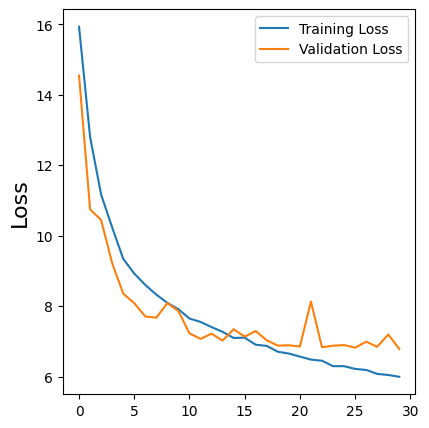

In [35]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.ylabel('Loss' , fontsize=16)
plt.plot(training_model.history['loss'] , label = 'Training Loss')
plt.plot(training_model.history['val_loss'] , label = 'Validation Loss')
plt.legend(loc = 'upper right')

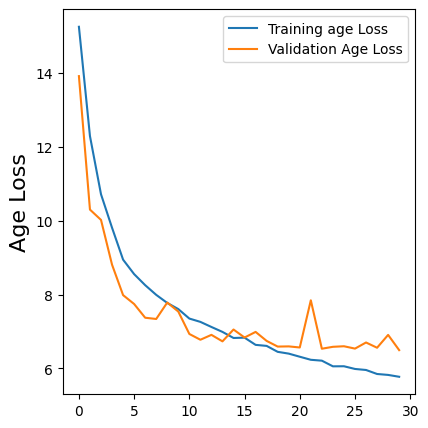

In [37]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.ylabel('Age Loss' , fontsize=16)
plt.plot(training_model.history['age_out_loss'] , label = 'Training age Loss')
plt.plot(training_model.history['val_age_out_loss'] , label = 'Validation Age Loss')
plt.legend(loc = 'upper right')

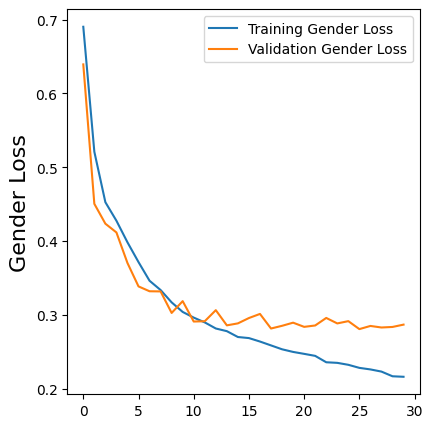

In [33]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.ylabel('Gender Loss' , fontsize=16)
plt.plot(training_model.history['gender_out_loss'] , label = 'Training Gender Loss')
plt.plot(training_model.history['val_gender_out_loss'] , label = 'Validation Gender Loss')
plt.legend(loc = 'upper right')

Original Gender: Male Original Age: 75
1/1 [==============================] - 0s 45ms/step
Predicted Gender: Male Predicted Age: 70


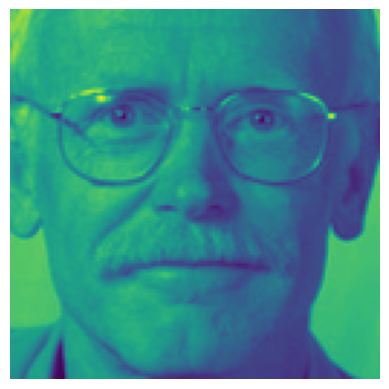

In [67]:
img_index = 90
print("Original Gender:", gender_mapping[y_gender[img_index]], "Original Age:", y_age[img_index])
# predict from model
pred = model.predict(X[img_index].reshape(1, 128, 128, 1))
pred_gender = gender_mapping[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[img_index]);

In [68]:
model.save('utkFace_cnn.h5')